In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
plt.style.use('seaborn')

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/josue-islas/Videogames/master/vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
df.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [5]:
df.dropna(how='any', inplace=True)


In [6]:
df.isna().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [7]:
df.loc[:, ['Year']] = df.Year.astype(int)
df.Year

0        2006
1        1985
2        2008
3        2009
4        1996
         ... 
16593    2002
16594    2003
16595    2008
16596    2010
16597    2003
Name: Year, Length: 16291, dtype: int32

In [26]:
df.sort_index(inplace=True)
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [9]:
df.to_csv('base_limpia.csv')

In [24]:
tabla_dinamica = df.groupby(['Genre'])[['Global_Sales']].sum()
tabla_dinamica

,Global_Sales
Genre,
Action,1722.84
Adventure,234.59
Fighting,444.05
Misc,789.87
Platform,829.13
Puzzle,242.21
Racing,726.76
Role-Playing,923.83
Shooter,1026.20


<AxesSubplot:xlabel='Genre', ylabel='Global_Sales'>

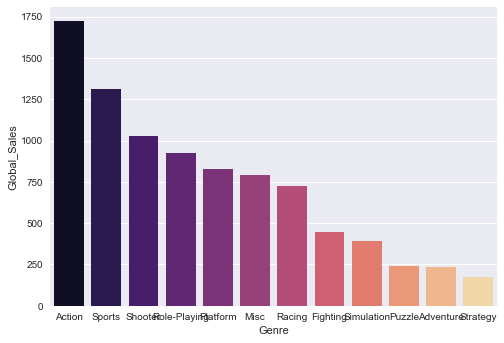

In [36]:
tabla_dinamica.sort_values('Global_Sales', ascending=False, inplace=True)

sns.barplot(x = tabla_dinamica.index, y = tabla_dinamica.Global_Sales, palette='magma')

Text(0.5, 1.0, 'Ventas mundiales por genero de videojuegos')

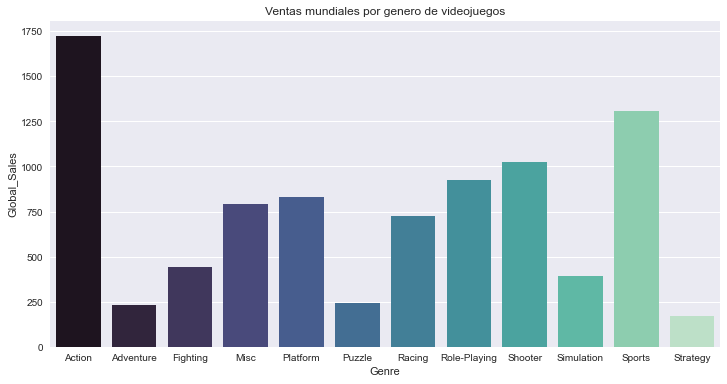

In [25]:
plt.figure(figsize = (12,6))
sns.barplot(x = tabla_dinamica.index, y = tabla_dinamica.Global_Sales, palette='mako')
plt.title('Ventas mundiales por genero de videojuegos')

In [ ]:
tabla_dinamica_2 = df.groupby(['Platform'])[['Global_Sales']].sum()
tabla_dinamica_2

In [61]:
tabla_dinamica_3 = df.groupby(['Name'])[['NA_Sales']].sum()
tabla_dinamica_3.sort_values('NA_Sales', inplace=True, ascending=False)
tabla_dinamica_3

,NA_Sales
Name,
Wii Sports,41.49
Super Mario Bros.,32.48
Duck Hunt,26.93
Tetris,26.17
Grand Theft Auto V,23.46
...,...
Pony Friends,0.00
Policenauts,0.00
Dragon Ball Z: Ultime Menace,0.00


<AxesSubplot:xlabel='Name'>

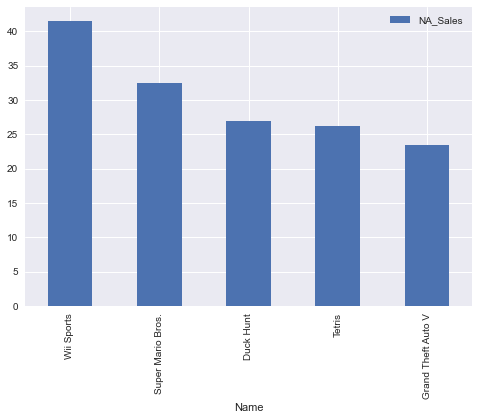

In [73]:
tabla_dinamica_3.iloc[0:5].plot.bar()

In [78]:
tabla_dinamica_3

,NA_Sales
Name,
Wii Sports,41.49
Super Mario Bros.,32.48
Duck Hunt,26.93
Tetris,26.17
Grand Theft Auto V,23.46
...,...
Pony Friends,0.00
Policenauts,0.00
Dragon Ball Z: Ultime Menace,0.00


<AxesSubplot:xlabel='Name'>

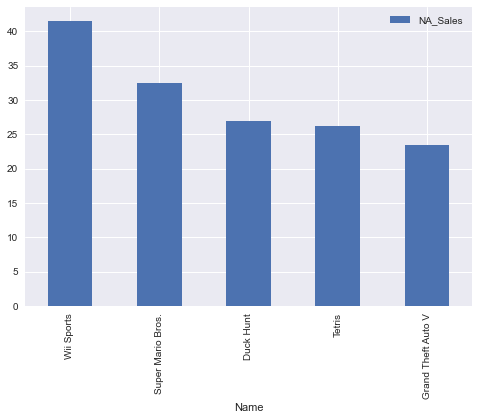

In [100]:
tabla_dinamica_3.head().plot.bar()

In [137]:
top_5 = tabla_dinamica_3.iloc[0:5]
top_5.reset_index(inplace=True)
top_5

,Name,NA_Sales
0,Wii Sports,41.49
1,Super Mario Bros.,32.48
2,Duck Hunt,26.93
3,Tetris,26.17
4,Grand Theft Auto V,23.46


In [136]:
el_resto = tabla_dinamica_3.iloc[5:].sum()
el_resto


NA_Sales    4177.12
dtype: float64

In [144]:
top5

,Name,NA_Sales
0,Wii Sports,41.49
1,Super Mario Bros.,32.48
2,Duck Hunt,26.93
3,Tetris,26.17
4,Grand Theft Auto V,23.46
5,NaN,4177.12


In [140]:
top5 = top_5.append(el_resto,ignore_index=True)



In [145]:
top5

,Name,NA_Sales
0,Wii Sports,41.49
1,Super Mario Bros.,32.48
2,Duck Hunt,26.93
3,Tetris,26.17
4,Grand Theft Auto V,23.46
5,NaN,4177.12


([<matplotlib.patches.Wedge at 0x2c9332d6980>,
 [Text(1.1994557469851652, 0.036137390944274164, 'Wii Sports'),
  Text(1.0961384018787135, 0.09209019452026515, 'Super Mario Bros.'),
  Text(1.091148730761662, 0.1392639485193991, 'Duck Hunt'),
  Text(1.0849712723900828, 0.18121075599490463, 'Tetris'),
  Text(1.0777399100464289, 0.22017421804815304, 'Grand Theft Auto V'),
  Text(-1.0934389421788604, -0.11996366002575484, 'nan')])

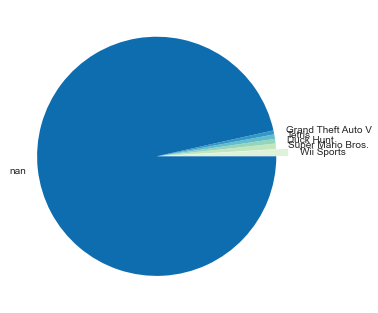

In [149]:
plt.pie(
    x = top5.NA_Sales, 
    labels=top5.Name, 
    colors=paleta_plt_1, 
    explode=(0.1,0,0,0,0,0)
)

Text(0.5, 1.0, 'Top 5 juegos mas vendidos en EUA')

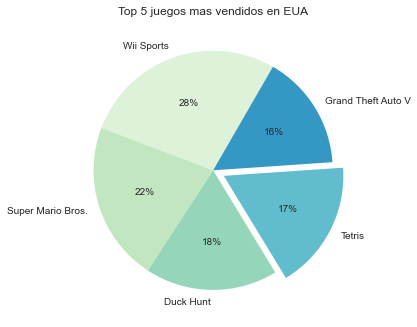

In [130]:
paleta_plt_1 = sns.color_palette('GnBu')

plt.pie(
    x = tabla_dinamica_3.head().NA_Sales, 
    labels=tabla_dinamica_3.head().index, 
    colors=paleta_plt_1, 
    autopct='%.0f%%', 
    startangle=60, 
    explode=(0,0,0,0.1,0)
    )
plt.title('Top 5 juegos mas vendidos en EUA')